# ICA - Source Separation
Blind Source Separation and Noise Removal Using ICA

### import libs

In [1]:
import numpy as np
from scipy.signal import sawtooth, square
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

### Parameters

In [2]:
fs=240
T=10
t=np.arange(0,T,1/fs)

### 1. Creating Source Signals

In [3]:
s1 = np.sin(2 * np.pi * 10 * t) 
s2 = sawtooth(2 * np.pi * 3 * t, 0.5) # triangle wave
s3 = np.sin(2 * np.pi * 20 * t)
s4 = square(2 * np.pi * 1 * t) 

In [4]:
def normalize(signal):
    signal = signal - np.mean(signal)
    signal = signal / np.std(signal)
    return signal

s1 = normalize(s1)
s2 = normalize(s2)
s3 = normalize(s3)
s4 = normalize(s4)


In [5]:
S = np.vstack([s1, s2, s3, s4])

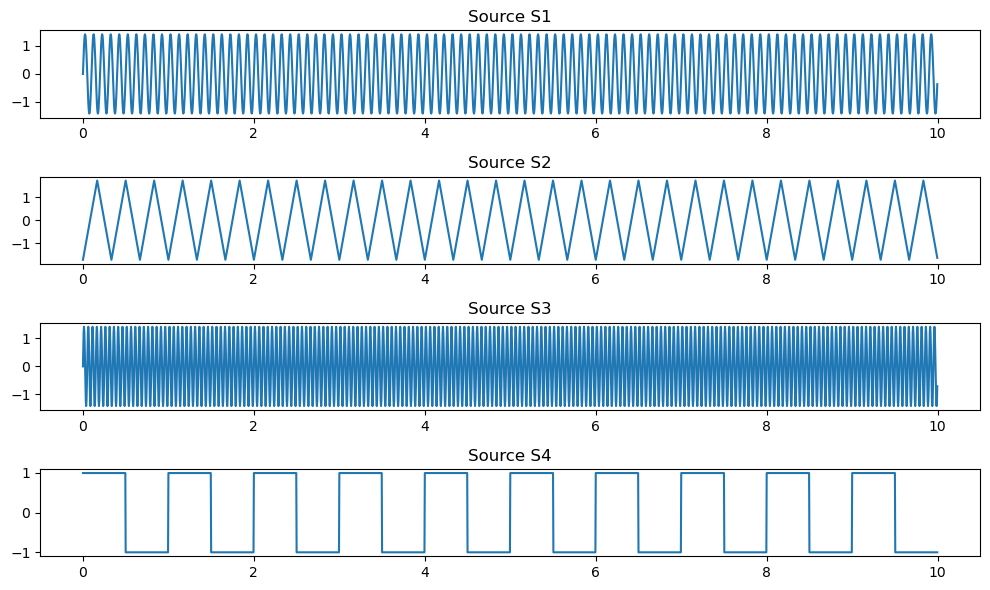

In [6]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.plot(t, S[i])
    plt.title(f"Source S{i+1}")
    plt.tight_layout()

plt.show()

### 2. Creating Mixing matrix A

In [7]:
rng = np.random.default_rng(42)
while True:
    A = rng.standard_normal((4, 4))
    if np.linalg.matrix_rank(A) == 4:
        break

In [8]:
print("Mixing matrix A:\n", A)

Mixing matrix A:
 [[ 0.30471708 -1.03998411  0.7504512   0.94056472]
 [-1.95103519 -1.30217951  0.1278404  -0.31624259]
 [-0.01680116 -0.85304393  0.87939797  0.77779194]
 [ 0.0660307   1.12724121  0.46750934 -0.85929246]]


### 3. Creating X (Observations)

In [9]:
X = A @ S

In [10]:
X_plot = (X - X.mean(axis=1, keepdims=True)) / X.std(axis=1, keepdims=True)

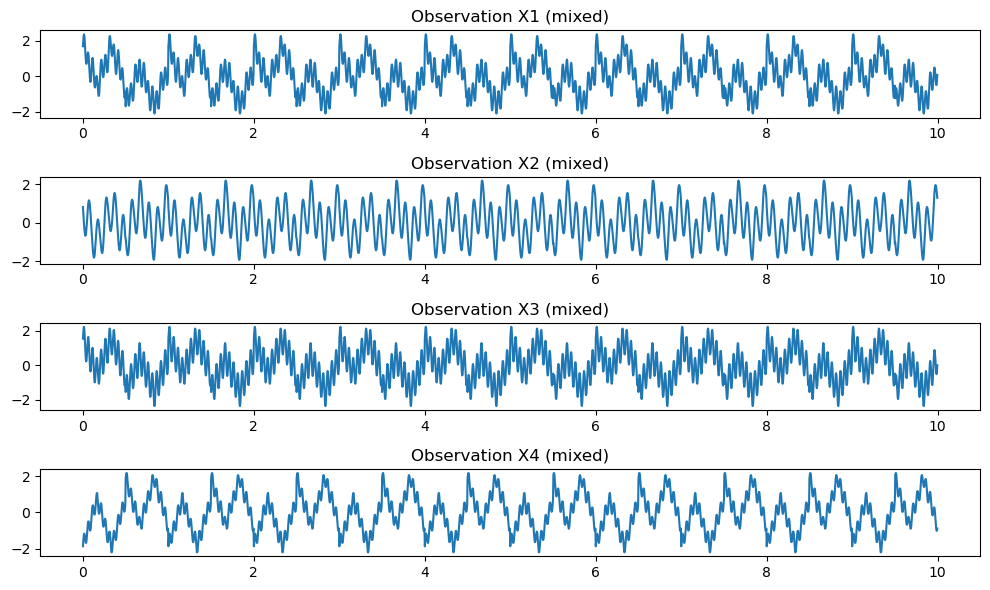

In [11]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(4, 1, i + 1)
    plt.plot(t, X_plot[i])
    plt.title(f"Observation X{i+1} (mixed)")
    plt.tight_layout()

plt.show()


### 4. Run FastICA on Observations

In [12]:
ica = FastICA(
    n_components=4,
    random_state=42,
    whiten="unit-variance",
    max_iter=2000,
    tol=1e-4
)

In [13]:
X_T = X.T

In [14]:
S_hat_T = ica.fit_transform(X_T) 
A_hat = ica.mixing_  
S_hat = S_hat_T.T

In [15]:
print("Estimated mixing matrix A_hat shape:", A_hat.shape)
print("Estimated sources S_hat shape:", S_hat.shape)

Estimated mixing matrix A_hat shape: (4, 4)
Estimated sources S_hat shape: (4, 2400)


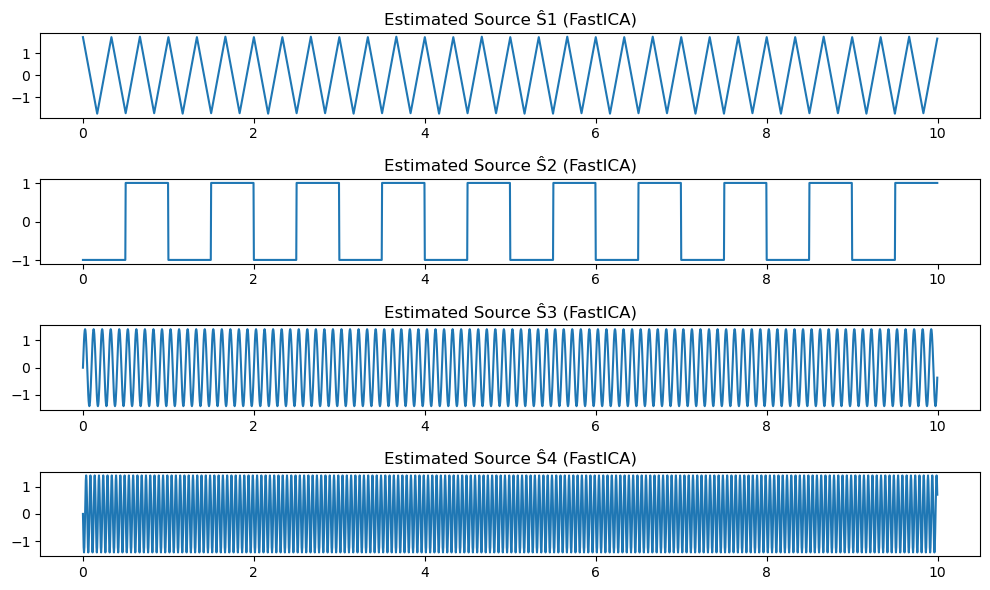

In [16]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(4, 1, i + 1)
    plt.plot(t, S_hat[i])
    plt.title(f"Estimated Source Ŝ{i+1} (FastICA)")
    plt.tight_layout()

plt.show()


### 5. Remove noise from observations (Hypothetical noise)

In [17]:
noise_idx = 3

In [18]:
S_hat_clean_T = S_hat_T.copy()
S_hat_clean_T[:, noise_idx] = 0.0

In [19]:
X_clean_T = S_hat_clean_T @ A_hat.T
X_clean = X_clean_T.T

In [20]:
def zscore_channels(M):
    return (M - M.mean(axis=1, keepdims=True)) / M.std(axis=1, keepdims=True)

X_plot = zscore_channels(X)
X_clean_plot = zscore_channels(X_clean)

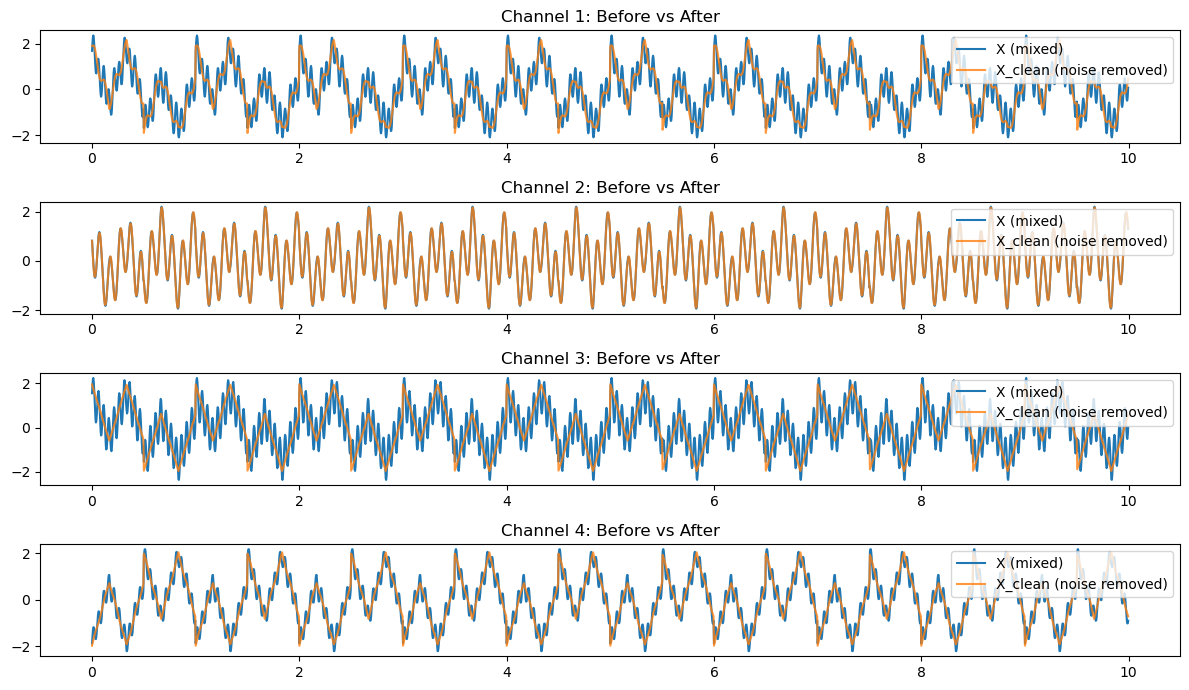

In [21]:
plt.figure(figsize=(12, 7))
for ch in range(4):
    plt.subplot(4, 1, ch + 1)
    plt.plot(t, X_plot[ch], label="X (mixed)")
    plt.plot(t, X_clean_plot[ch], label="X_clean (noise removed)", alpha=0.8)
    plt.title(f"Channel {ch+1}: Before vs After")
    plt.legend(loc="upper right")
    plt.tight_layout()

plt.show()
